In [4]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm_notebook
from scipy import optimize

%matplotlib inline

In [5]:
def model_data(p, N, maxn, minn=2):
    data=[]
    for i in range(N):
        n_i=np.random.randint(minn, maxn)
        quantity=np.random.binomial(n_i, p)
        vec=np.array([1 for j in range(quantity)]+[0 for j in range(n_i-quantity)])
        np.random.shuffle(vec)
        assert(len(vec)==n_i)
        data.append(vec)
    return data

In [6]:
X=model_data(0.2, 30, 15)

To recreate conditions described in the problem formulation we only allow our program to know if vector contains at least one 1 value.

In [7]:
def estimation(p, data):
    value=0
    for vec in data:
        a=int(bool(sum(vec)))
        n=len(vec)
        v=(a*n*(1-p)**(n-1))/(1-(1-p)**(n-1))-((1-a)*n)/(1-p)
        value+=v
    return value

In [8]:
def characterize(p, N, maxn, itnum=1000):
    pdf=[]
    for i in range(itnum):
        dat=model_data(p, N, maxn)
        phat=optimize.fsolve(estimation, 0.5, args=dat)
        assert(len(phat)==1)
        pdf.append(phat[0]/p)
    return pdf

/home/dmitry/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/dmitry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


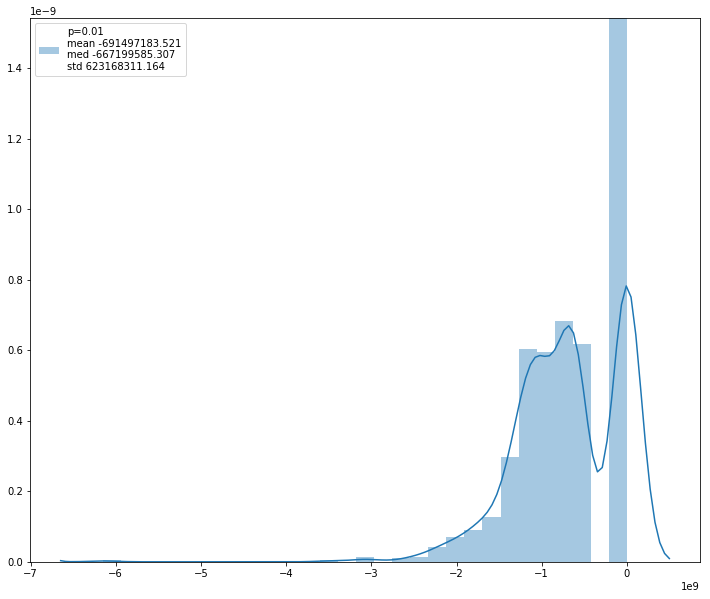

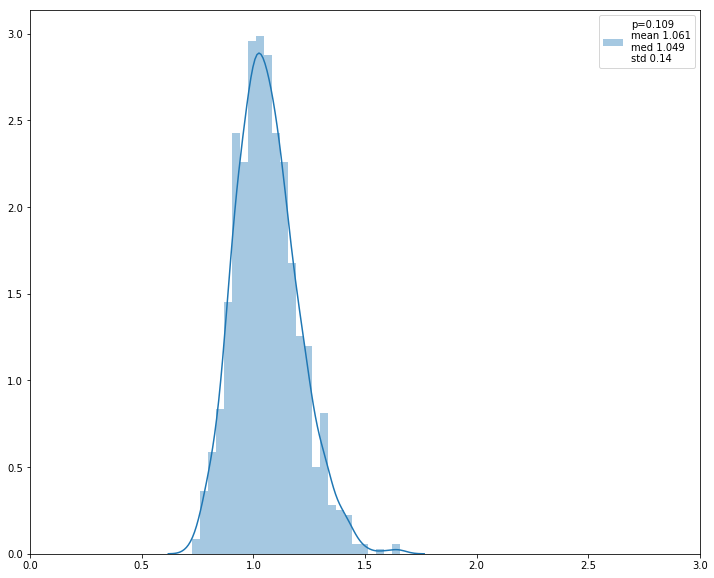

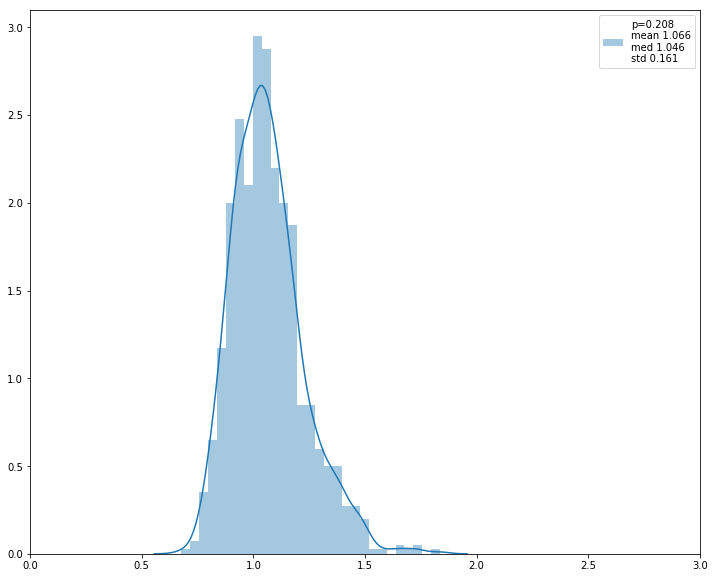

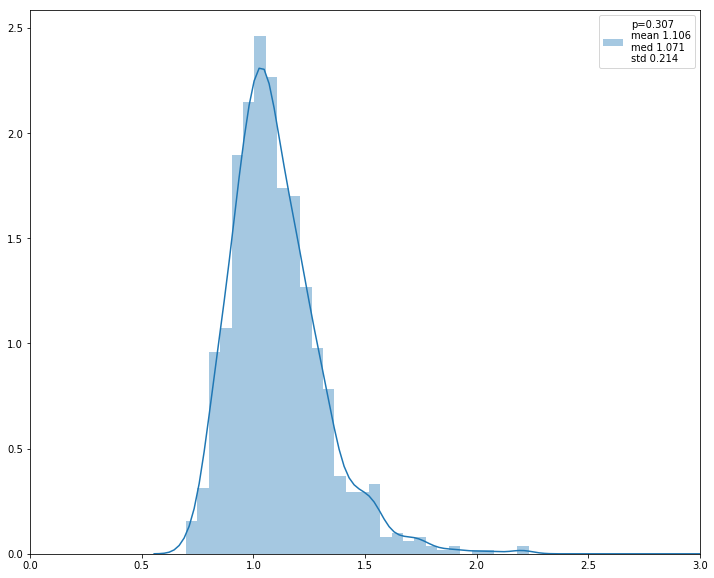

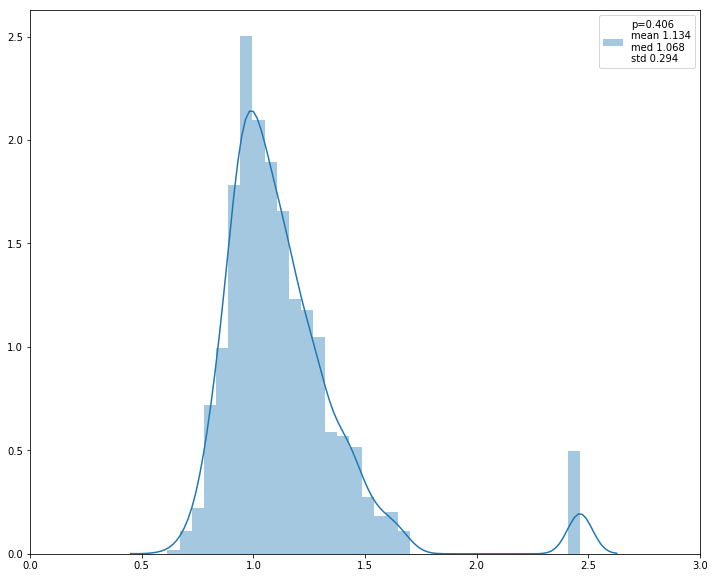

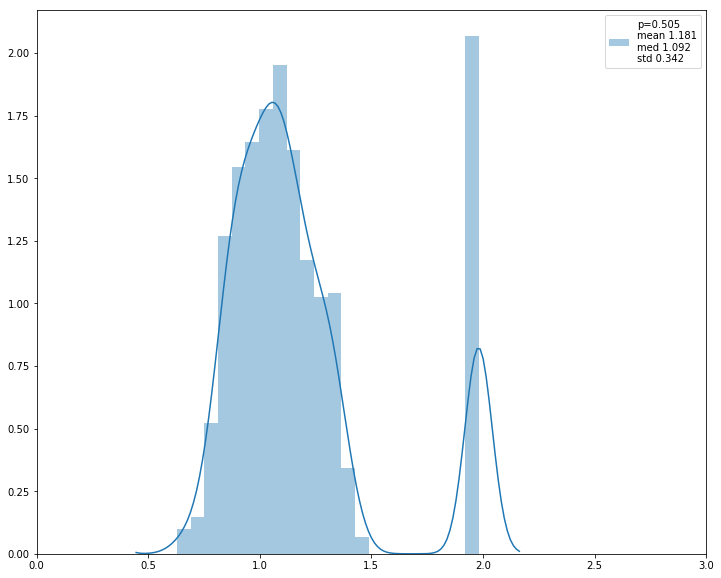

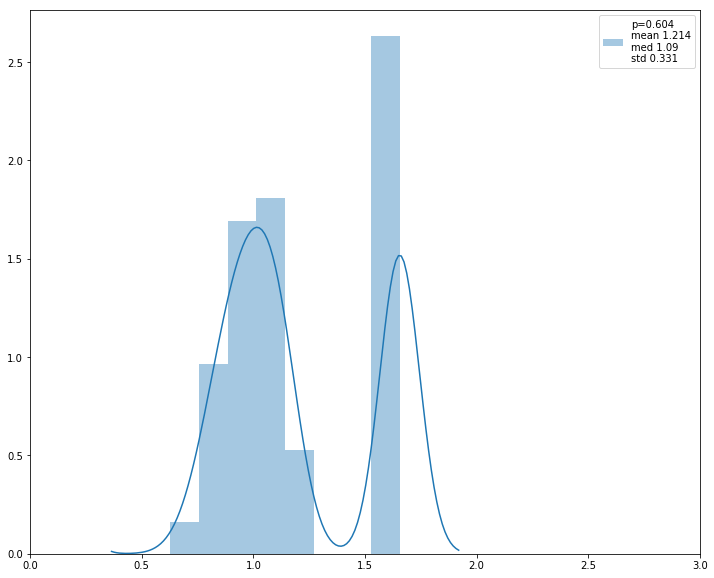

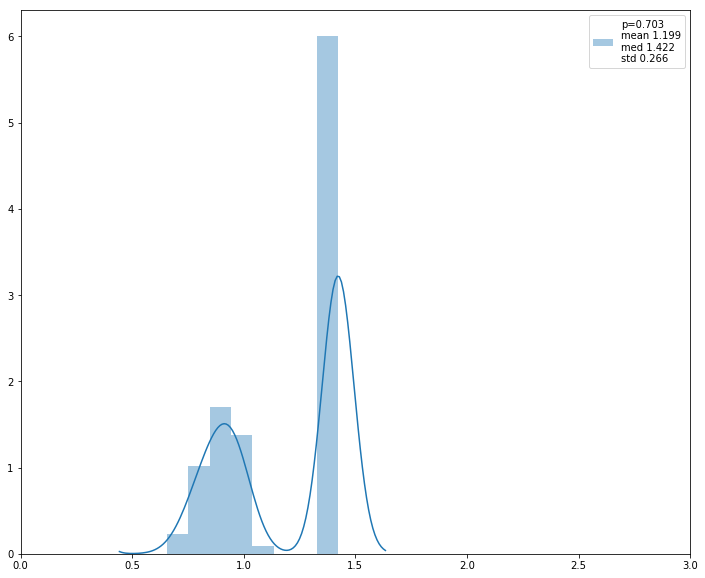

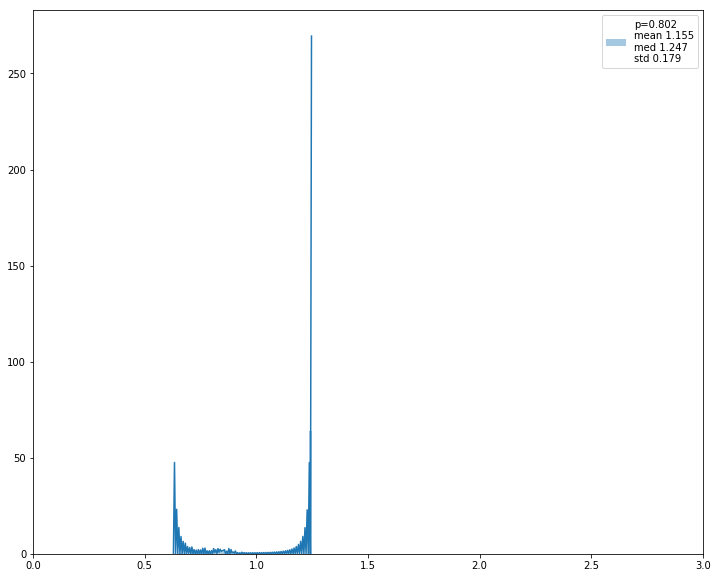

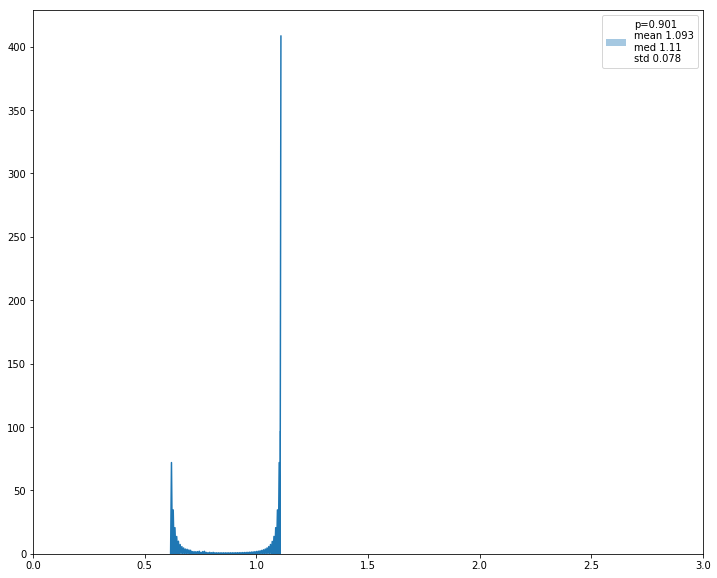

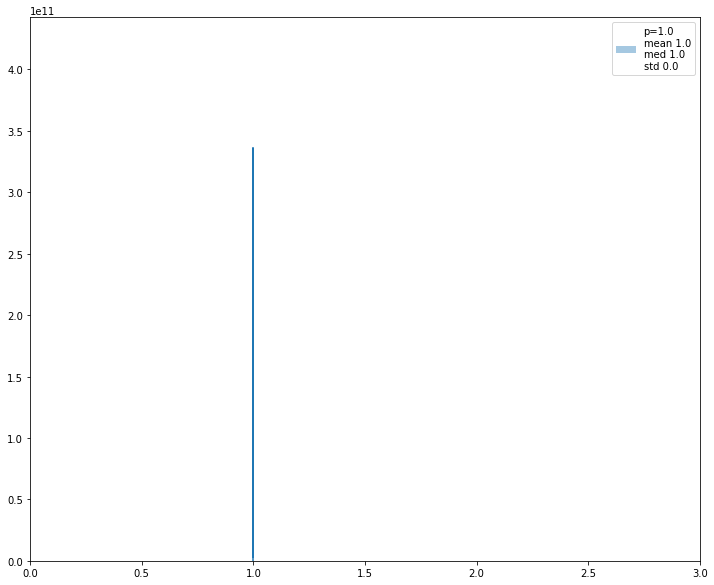

In [11]:
for i, p in enumerate(np.linspace(10**-2, 1, 11)):

    pdf=characterize(p, 100, 25)
    plt.figure(figsize=[12, 10])
    if i!=0:
        plt.gca().set_xlim([0, 3])
    sns.distplot(pdf, label='p={}\nmean {}\nmed {}\nstd {}'.format(np.round(p, 3), 
                                                  np.round(np.mean(pdf), 3),
                                                  np.round(np.median(pdf), 3),
                                                  np.round(np.std(pdf), 3)))
    plt.legend()

Samples with 100 observations in each, where observation is up-to-25-dimensional vector, have been generated 1000 times for 11 differenet values of $p$. Emprirical probabily density functions of $\frac{\hat{p}}{p}$ were obtained.

As we can see for very small values of $p=0.01$ there is some error in the estimation of $\hat{p}$, its value tends to be negative and very large by its absolute value.

Then for $p$=0.1, 0.2, 0.3 we get nice bell-shaped distribution with the mean and the median around 1. 

As $p$ gets larger, second mode appears in PDF, then it seems like those two modes start to converge to 1 and the variance of the estimations gets smaller.

Summing up, the obtained estimation seems to be adequate for $0.1<p<0.4$, for the values of $0.4<p<0.6$ increase in both variance and bias occurs, but as the $p$ gets larger PDF narrows down to 1.